We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

**When you have more than two classes as an option, this is known as multiclass classification.**

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

📖 Resource: The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Show the First Training Exampls
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [7]:
# Chek the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

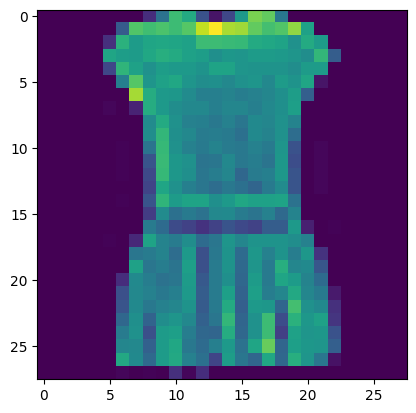

In [11]:
# Plot a singel sample
plt.imshow(train_data[3])

In [10]:
# Checl out sample lable
train_labels[3]

3

In [13]:
### Create a small list so, we can index onto our training labels, so they are human readable.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

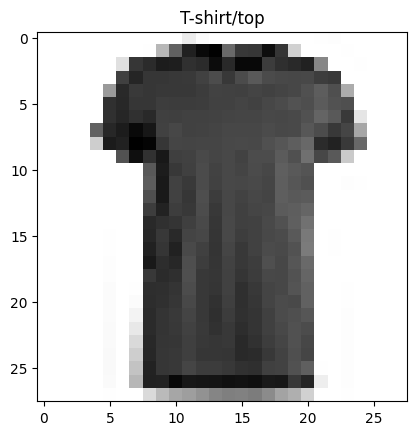

In [14]:
# Plot an example image and its label
index_of_choice=17

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

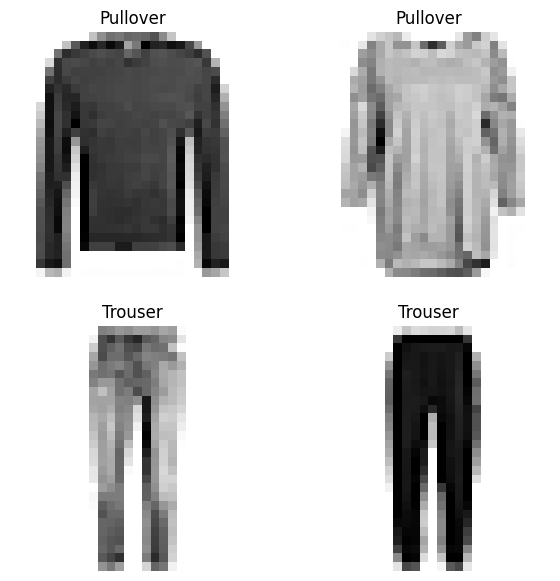

In [15]:
# plot Multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

- The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
- The output shape will have to be 10 because we need our model to predict for 10 different classes.
  - We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
- We'll need to *change our loss function from a binary loss function to a multiclass loss function*.
  - More specifically, since our labels are in integer form, we'll use **tf.keras.losses.SparseCategoricalCrossentropy()**, if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
- We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [18]:
# the flatten layer (our data needs to be flattened from 28*28 to(None, 784))
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])

flatten_model.output_shape

(None, 784)

In [19]:
28*28

784

In [25]:
# Set the seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"), # output shape is 10, activation is softmax
])

# compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=30,
                                validation_data=(test_data, test_labels))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3413 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

# Extra Code for personal reference

What to do if the training albels are one-hot encoded format

In [26]:
# how to perform one-hot encoding to our training labels
training_labels_one_hot = tf.one_hot(train_labels[:10], depth=10)
training_labels_one_hot

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [27]:
# set the seed
tf.random.set_seed(42)


# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])


# compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# fit the model
hist_alt = model_11.fit(train_data,
                        tf.one_hot(train_labels, depth=10),
                        epochs=10,
                        validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 2.3784 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [28]:
#  Check the model summary
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [30]:
# We can get our training and testind data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [32]:
# now that out data is normalized, let's build a model to find patterns in it

# set the seed
tf.random.set_seed(42)

# create the model same as before
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])


# Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=30,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5263 - accuracy: 0.3488 - val_loss: 1.1799 - val_accuracy: 0.4992
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9012 - accuracy: 0.6520 - val_loss: 0.7735 - val_accuracy: 0.7245
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6740 - accuracy: 0.7629 - val_loss: 0.6626 - val_accuracy: 0.7699
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6113 - accuracy: 0.7825 - val_loss: 0.6268 - val_accuracy: 0.7815
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5866 - accuracy: 0.7921 - val_loss: 0.6100 - val_accuracy: 0.7870
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5710 - accuracy: 0.7976 - val_loss: 0.6114 - val_accuracy: 0.7897
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5610 - accuracy: 0.8039 - val_loss: 0.6195 - val_accuracy:

Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

## Plotting each model's Loss Curves

<Axes: title={'center': 'normalized data'}>

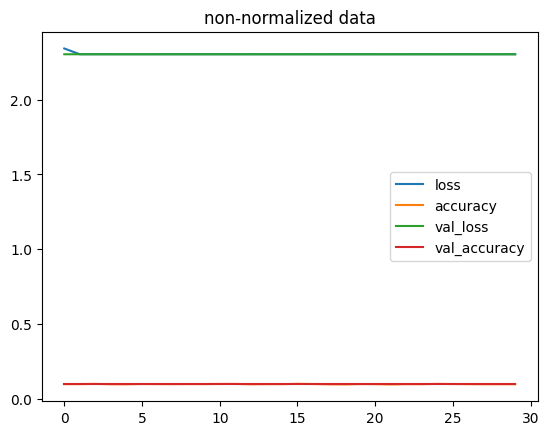

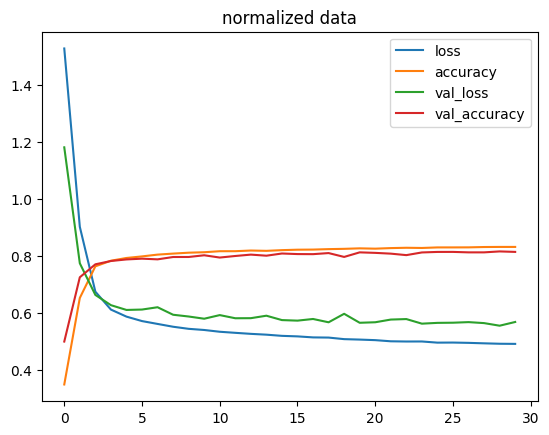

In [33]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="non-normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")

# Find the ideal Learning Rate and rebuild the model using that learning rate

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

In [35]:
# set seed
tf.random.set_seed(42)

# creat the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit thee model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1997 - accuracy: 0.5658 - val_loss: 0.8025 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7256 - accuracy: 0.7427 - val_loss: 0.7067 - val_accuracy: 0.7522 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6583 - accuracy: 0.7618 - val_loss: 0.6835 - val_accuracy: 0.7421 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6282 - accuracy: 0.7731 - val_loss: 0.6510 - val_accuracy: 0.7648 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6127 - accuracy: 0.7802 - val_loss: 0.6378 - val_accuracy: 0.7769 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6012 - accuracy: 0.7848 - val_loss: 0.6363 - val_accuracy: 0.7804 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

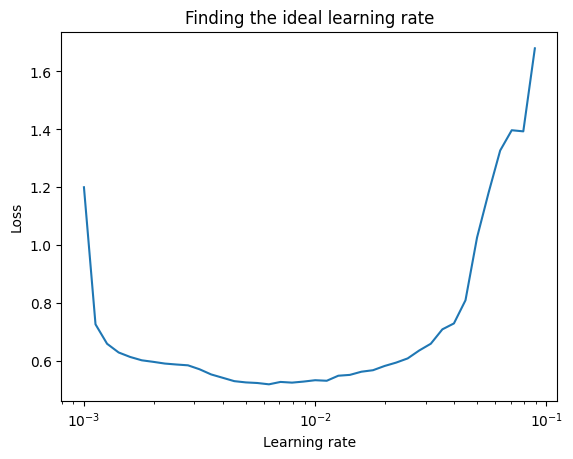

In [36]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=30,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2253 - accuracy: 0.5634 - val_loss: 0.7897 - val_accuracy: 0.7119
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7061 - accuracy: 0.7259 - val_loss: 0.6891 - val_accuracy: 0.7210
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6477 - accuracy: 0.7395 - val_loss: 0.6543 - val_accuracy: 0.7439
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6137 - accuracy: 0.7723 - val_loss: 0.6219 - val_accuracy: 0.7729
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5888 - accuracy: 0.7843 - val_loss: 0.6362 - val_accuracy: 0.7599
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5722 - accuracy: 0.7908 - val_loss: 0.6023 - val_accuracy: 0.7874
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5570 - accuracy: 0.8052 - val_loss: 0.6022 - val_accuracy:

## Evaluating our Multi Class Classification Model

We could:

- Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
- Assess some of its predictions (through visualizations).
- Improve its accuracy (by training it for longer or changing the architecture).
- Save and export it for use in an application.

In [40]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [41]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.5325128e-05, 1.4212745e-07, 6.0733057e-10, 8.7258677e-06,
        6.1007324e-09, 1.0200007e-01, 2.7122204e-07, 1.1252762e-01,
        5.8916322e-04, 7.8485870e-01],
       [7.3982920e-03, 1.7499791e-09, 9.5640039e-01, 3.6430811e-05,
        6.6798169e-04, 2.2283288e-12, 3.5242118e-02, 2.5407146e-04,
        7.4329620e-07, 4.3169035e-10],
       [1.2053755e-05, 9.9161190e-01, 8.8713887e-07, 7.5691082e-03,
        7.6968840e-04, 7.2044863e-08, 2.9645616e-06, 4.0413925e-10,
        6.2538800e-07, 3.2724845e-05],
       [4.6386890e-07, 9.9717164e-01, 1.7840214e-09, 2.8000155e-03,
        1.2968158e-05, 3.4832029e-10, 2.3579524e-08, 5.2707535e-13,
        3.0978033e-08, 1.4873796e-05],
       [2.8461543e-01, 3.8419448e-06, 2.5806347e-01, 3.3115018e-02,
        1.6720606e-02, 1.0412956e-09, 4.0566048e-01, 5.4189202e-04,
        1.2744068e-03, 4.7589047e-06]], dtype=float32)

In [42]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

Now, we will do the same for all the predictions

In [43]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# view the first 10 predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [44]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[756,   0,  25,  88,  11,   1, 102,   4,  13,   0],
       [  0, 937,   5,  40,  15,   0,   2,   1,   0,   0],
       [ 23,   0, 751,  14, 135,   0,  76,   0,   1,   0],
       [ 50,   7,  19, 837,  39,   0,  43,   0,   5,   0],
       [  1,   4, 165,  27, 725,   0,  73,   0,   5,   0],
       [  0,   0,   0,   1,   1, 896,   2,  65,   3,  32],
       [182,   2, 170,  49, 121,   0, 457,   1,  18,   0],
       [  0,   0,   0,   0,   0,  21,   0, 935,   2,  42],
       [  2,   0,   1,  10,   6,   3,  54,   6, 918,   0],
       [  1,   0,   0,   0,   0,  16,   0,  45,   1, 937]])

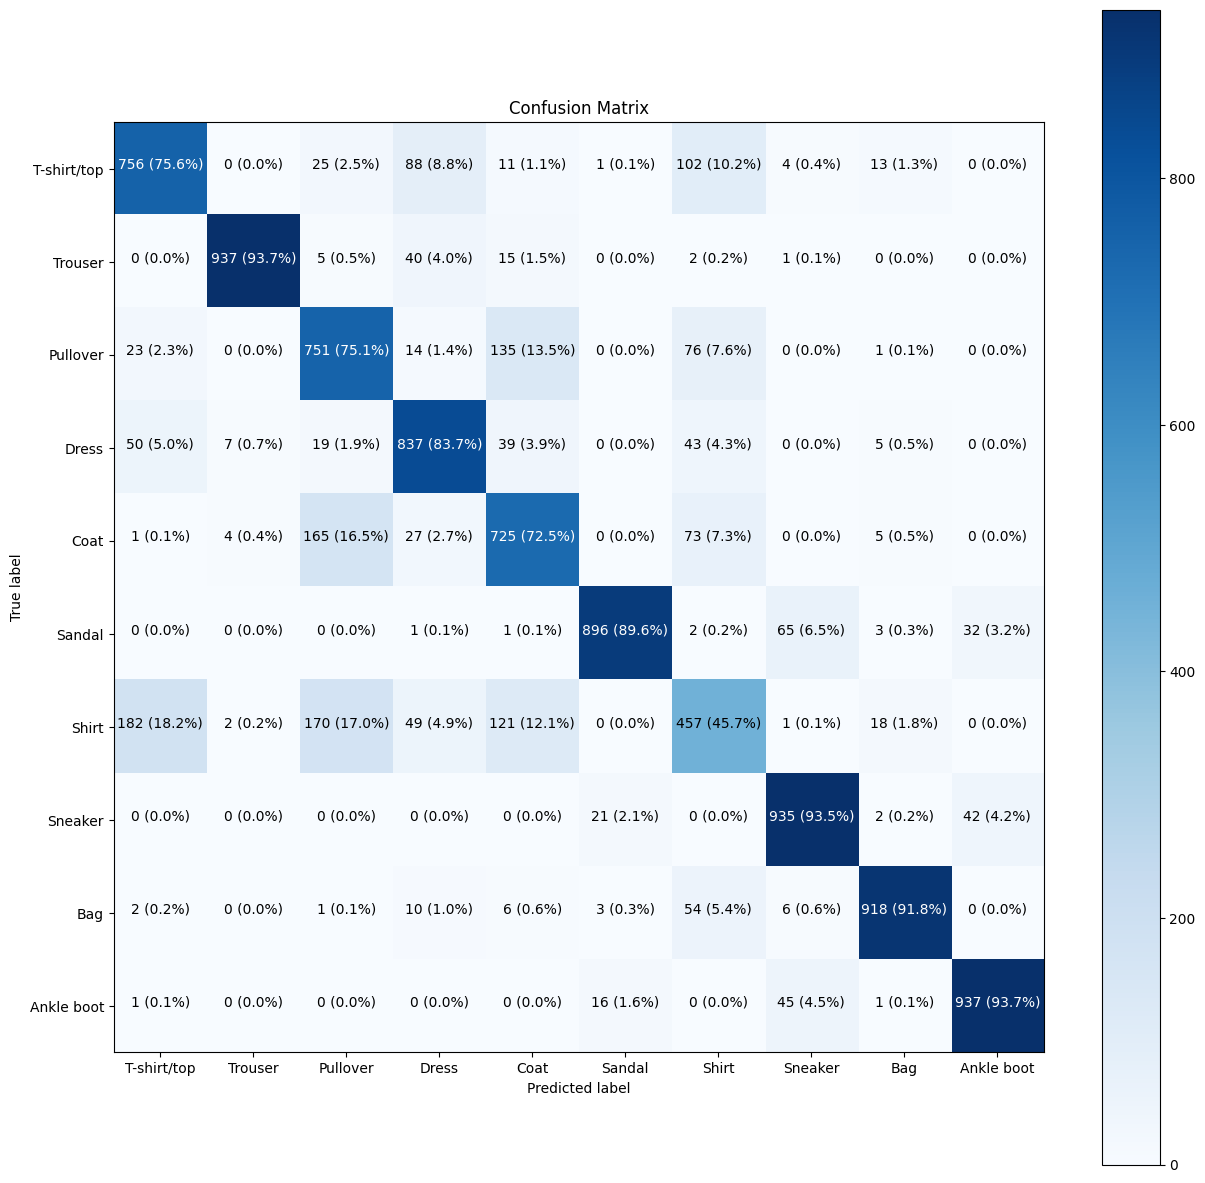

In [45]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

# Visualize **Predictions**
Let's create a function to plot a random image along with its prediction.

In [46]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 66ms/step


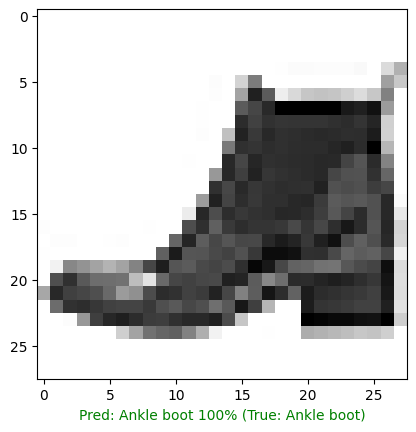

In [48]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What Patterns is our Model Learning

In [49]:
# Find the layers of the most recent model
model_14.layers

We can access a target layer using indexing.

In [50]:
# Extract a particular layer
model_14.layers[1]

And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [52]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[-0.6536986 ,  0.00493539,  0.70308214, -0.9590734 ],
        [-0.88844305,  1.4673433 , -0.01009177, -0.7993244 ],
        [-0.7112989 ,  0.5414724 ,  1.5562757 , -1.3510247 ],
        ...,
        [-0.5963679 ,  0.3432003 , -0.35942268, -0.47398564],
        [ 0.27787885, -0.46785322, -1.1623611 , -0.06124899],
        [-0.8120838 ,  0.11593851, -0.00232442, -0.5425598 ]],
       dtype=float32),
 (784, 4))

In [53]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

## Check the Bias Vector

In [54]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-1.19164   ,  1.9163951 , -0.09373894,  1.6136727 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

**the weights matrix has 1 value per data point, whereas the bias matrix has 1 value per hidden unit of neuron.**


In [56]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

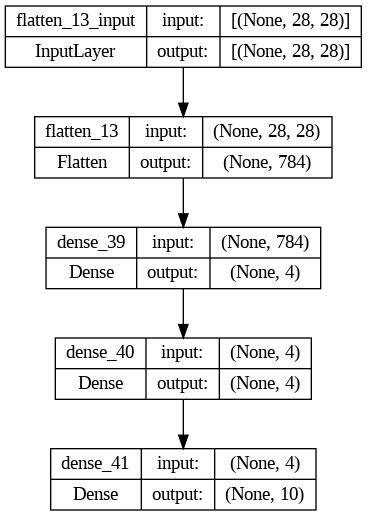

In [57]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.